# Avaliação Quaest
## Tobias de Abreu Kuse

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('darkgrid')

from tabela import tabela_contingencia

In [2]:
df = pd.read_excel('bd_surveyquaest.xlsx')

In [3]:
df.head()

,sbjnum,sexo,idade,rendaf,esc,aval_gov,voto1
0,136037235,Masculino,57,"De R$ 2.091,00 a R$ 3.135,00 (+ de 2SM até 3 SM)",Ensino médio completo,Regular positiva,Candidato 2
1,136037575,Masculino,32,"De R$ 2.091,00 a R$ 3.135,00 (+ de 2SM até 3 SM)",Ensino médio completo,Boa,Ninguém/Branco/Nulo
2,136038074,Masculino,70,"De R$ 5.226,00 a R$ 10.450,00 (+ de 5SM até 10...",Ensino médio completo,Boa,Candidato 2
3,136041069,Masculino,50,"De R$ 2.091,00 a R$ 3.135,00 (+ de 2SM até 3 SM)",Ensino fundamental incompleto,Ótima,Candidato 2
4,136041107,Masculino,24,"De R$ 3.136,00 a R$ 5.225,00 (+ de 3SM até 5 SM)",Ensino superior incompleto,Boa,Candidato 2


### Verificação inicial

In [4]:
# Verificar o formato dos dados
linhas, colunas = df.shape
print(f'Os dados possuem {linhas} linhas e {colunas} colunas.')

Os dados possuem 1000 linhas e 7 colunas.


In [5]:
# Verificar se há dados faltantes
dados_faltantes = df.isnull().sum().sum()
print(f'Quantidade de dados faltantes: {dados_faltantes}')

Quantidade de dados faltantes: 0


In [6]:
# Checar se há registros duplicados
registros_duplicados = df.duplicated().sum()
print(f'Quantidade de registros duplicados: {registros_duplicados}')

Quantidade de registros duplicados: 0


In [7]:
# Ver se os ids são unicos
ids_duplicados = df['sbjnum'].duplicated().sum()
print(f'Quantidade de ids duplicados: {ids_duplicados}')

Quantidade de ids duplicados: 0


In [8]:
# Tipo de cada variável
df.dtypes

sbjnum       int64
sexo        object
idade        int64
rendaf      object
esc         object
aval_gov    object
voto1       object
dtype: object

### Contagens nos dados categóricos

In [9]:
# sexo
df.sexo.value_counts()

Feminino     545
Masculino    455
Name: sexo, dtype: int64

In [10]:
# rendaf: faixa da renda familiar
df.rendaf.value_counts(normalize=True)*100

# 45,1% (24.6% + 20.5%) dos entrevistados são de famílias de baixa renda i.e até 2 salários mínimos.

2021-04-30 15:03:50.661 INFO    numexpr.utils: NumExpr defaulting to 4 threads.


De R$ 1.046,00 a R$ 2.090,00 (+ de 1SM até 2 SM)        24.6
De R$ 2.091,00 a R$ 3.135,00 (+ de 2SM até 3 SM)        21.0
Até R$ 1.045,00 (até 1 SM)                              20.5
De R$ 3.136,00 a R$ 5.225,00 (+ de 3SM até 5 SM)        17.7
De R$ 5.226,00 a R$ 10.450,00 (+ de 5SM até 10 SM)      11.0
De R$ 10.451,00 a R$ 15.675,00 (+ de 10SM até 15 SM)     2.8
De R$ 15.676,00 a R$ 20.900,00 (+ de 15SM até 20 SM)     1.7
Mais de R$ 20.900,00 (+ de 20 SM)                        0.7
Name: rendaf, dtype: float64

In [11]:
# esc: escolaridade
df.esc.value_counts()

# Mais de 30% dos participantes possui o ensino médio completo

Ensino médio completo                       326
Ensino superior completo                    195
Ensino fundamental incompleto               184
Ensino superior incompleto                  105
Ensino médio incompleto                      89
Ensino fundamental completo                  84
Sem instrução e menos de 1 ano de estudo     17
Name: esc, dtype: int64

In [12]:
# aval_gov: avaliação do governo
df.aval_gov.value_counts(normalize=True)*100

# 62.4% dos entrevistados tem uma avalição bem positiva do governo (boa e ótima).

Boa                 44.3
Ótima               18.1
Regular positiva    17.5
Regular negativa     7.4
Péssima              6.4
Ruim                 4.9
NS/NR                1.4
Name: aval_gov, dtype: float64

In [13]:
# voto1: Intenção de voto
df.voto1.value_counts()

# O canditado 2 mostra larga vantangem sobre os outros candidatos

Candidato 2            523
Ninguém/Branco/Nulo    142
NS/NR                  140
Candidato 1             42
Candidato 8             26
Candidato 5             25
Candidato 10            20
Candidato 9             19
Candidato 3             16
Candidato 4             12
Candidato 6             10
Candidato 7              7
Candidato 14             6
Candidato 12             6
Candidato 11             3
Candidato 13             3
Name: voto1, dtype: int64

In [14]:
# voto1: Intenção de voto; porcentagem da intenção de voto
df.voto1.value_counts(normalize=True)*100

# O candidato 2 possui mais intensões de votos que todos os outros candidatos combinados

Candidato 2            52.3
Ninguém/Branco/Nulo    14.2
NS/NR                  14.0
Candidato 1             4.2
Candidato 8             2.6
Candidato 5             2.5
Candidato 10            2.0
Candidato 9             1.9
Candidato 3             1.6
Candidato 4             1.2
Candidato 6             1.0
Candidato 7             0.7
Candidato 14            0.6
Candidato 12            0.6
Candidato 11            0.3
Candidato 13            0.3
Name: voto1, dtype: float64

### Estatíticas da variável numérica: idade

In [15]:
# média de idade
media = df['idade'].mean()
print(f'A média de idade dos participantes da pesquisa é de {int(media)} anos')

A média de idade dos participantes da pesquisa é de 44 anos


In [16]:
idade_maxima = df['idade'].max()
idade_minima = df['idade'].min()
print(f'As pessoas mais jovens na pesquisa tem {idade_minima} anos e as pessoas com mais idade tem {idade_maxima} anos.')

As pessoas mais jovens na pesquisa tem 17 anos e as pessoas com mais idade tem 86 anos.


#### Médias de idades separadas por grupos

In [17]:
# sexo
df.groupby(['sexo'])['idade'].mean().round(0)

sexo
Feminino     45.0
Masculino    44.0
Name: idade, dtype: float64

In [18]:
# média de idade por renda familiar
df.groupby(['rendaf'])['idade'].mean().round(0)

# Pessoas com maior idade na pesquisa são as que tem menor renda.

rendaf
Até R$ 1.045,00 (até 1 SM)                              49.0
De R$ 1.046,00 a R$ 2.090,00 (+ de 1SM até 2 SM)        43.0
De R$ 10.451,00 a R$ 15.675,00 (+ de 10SM até 15 SM)    46.0
De R$ 15.676,00 a R$ 20.900,00 (+ de 15SM até 20 SM)    37.0
De R$ 2.091,00 a R$ 3.135,00 (+ de 2SM até 3 SM)        43.0
De R$ 3.136,00 a R$ 5.225,00 (+ de 3SM até 5 SM)        44.0
De R$ 5.226,00 a R$ 10.450,00 (+ de 5SM até 10 SM)      42.0
Mais de R$ 20.900,00 (+ de 20 SM)                       43.0
Name: idade, dtype: float64

In [19]:
# média de idade por escolaridade
df.groupby(['esc'])['idade'].mean().round(0)

esc
Ensino fundamental completo                 49.0
Ensino fundamental incompleto               57.0
Ensino médio completo                       41.0
Ensino médio incompleto                     35.0
Ensino superior completo                    45.0
Ensino superior incompleto                  33.0
Sem instrução e menos de 1 ano de estudo    67.0
Name: idade, dtype: float64

In [20]:
# média de idade por avaliação do governo
df.groupby(['aval_gov'])['idade'].mean().round(0)

aval_gov
Boa                 44.0
NS/NR               41.0
Péssima             45.0
Regular negativa    41.0
Regular positiva    44.0
Ruim                44.0
Ótima               47.0
Name: idade, dtype: float64

In [21]:
# média de idade por Intenção de voto
df.groupby(['voto1'])['idade'].mean().round(0)

voto1
Candidato 1            49.0
Candidato 10           37.0
Candidato 11           42.0
Candidato 12           49.0
Candidato 13           48.0
Candidato 14           29.0
Candidato 2            45.0
Candidato 3            43.0
Candidato 4            54.0
Candidato 5            35.0
Candidato 6            36.0
Candidato 7            49.0
Candidato 8            41.0
Candidato 9            37.0
NS/NR                  44.0
Ninguém/Branco/Nulo    45.0
Name: idade, dtype: float64

## Algumas visualizações
A partir daqui irei usar os dados que foram pré-processados com o script `preprocessing.py`.<br>
Nesse script eu criei três variáveis: `Faixa etária`, `Renda média familiar` e `Salário mínimo`.<br><br>
Aqui eu também irei gerar algumas visualizações para comparar as variáveis numéricas: `Idade` e `Renda média familiar` com as variáveis categóricas: `Sexo`, `Escolaridade`, `Avaliação do governo` e `Intenção de voto`

In [22]:
dados = pd.read_csv('bd_surveyquaest_clean.csv')
dados.head()

,Sexo,Idade,Escolaridade,Avaliação do governo,Intenção de voto,Faixa etária,Renda média familiar,Salário mínimo
0,Masculino,57,Médio completo,Regular positiva,Candidato 2,55-64,2613.0,de 2 a 3
1,Masculino,32,Médio completo,Boa,Branco/Nulo,25-34,2613.0,de 2 a 3
2,Masculino,70,Médio completo,Boa,Candidato 2,65+,7838.0,de 5 a 10
3,Masculino,50,Fundamental incompleto,Ótima,Candidato 2,45-54,2613.0,de 2 a 3
4,Masculino,24,Superior incompleto,Boa,Candidato 2,17-24,4180.5,de 3 a 5


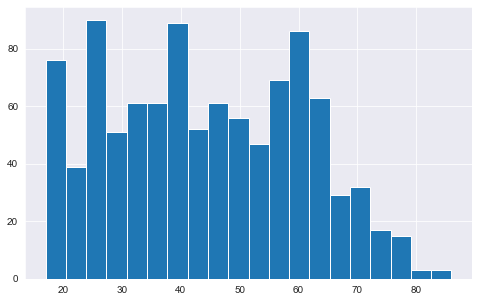

In [23]:
# histograma da idade

fig, ax = plt.subplots(figsize=(8,5))
dados['Idade'].hist(bins=20);

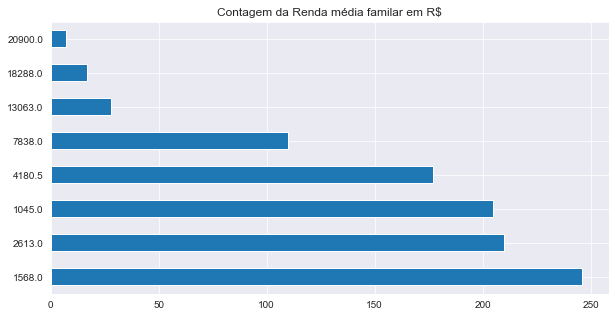

In [24]:
# barplot da renda média familiar

fig, ax = plt.subplots(figsize=(10,5))
dados['Renda média familiar'].value_counts().plot.barh(title='Contagem da Renda média familar em R$');

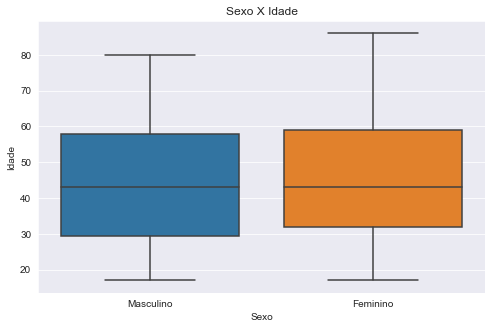

In [25]:
# boxplot com idade ente sexos

fig, ax = plt.subplots(figsize=(8,5))
plot = sns.boxplot(x='Sexo', y='Idade', data=dados)
plot.set_title('Sexo X Idade');

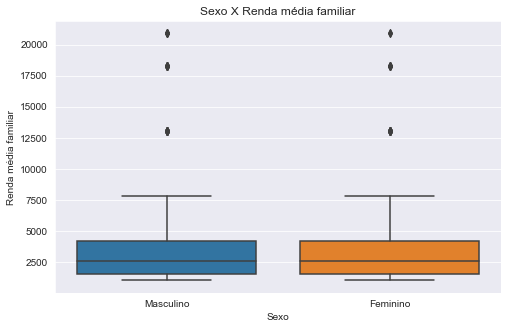

In [26]:
# boxplot com idade ente sexos

fig, ax = plt.subplots(figsize=(8,5))
plot = sns.boxplot(x='Sexo', y='Renda média familiar', data=dados)
plot.set_title('Sexo X Renda média familiar');

### Escolaridade

In [27]:
# ordenar de forma crescente o gráfico
ordem = ['Sem instrução',
        'Fundamental incompleto',
        'Fundamental completo',
        'Médio incompleto',
        'Médio completo',
        'Superior incompleto',
        'Superior completo']

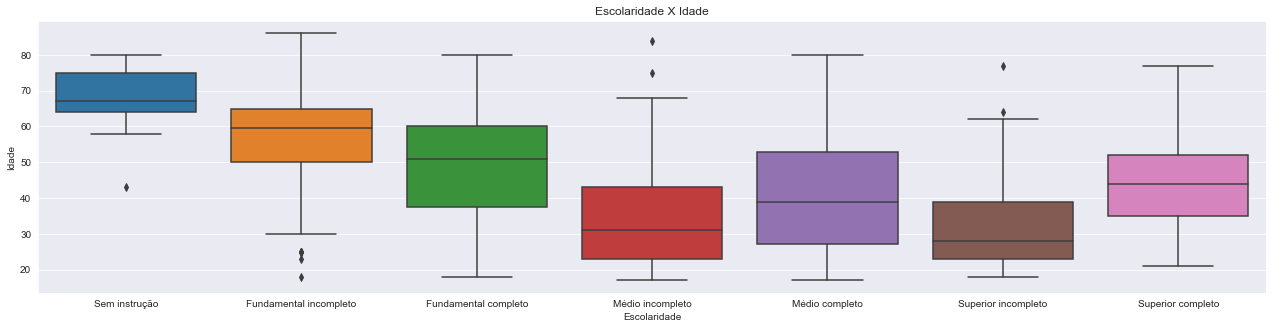

In [28]:
# boxplot com idade ente escolaridade

fig, ax = plt.subplots(figsize=(22,5))
plot = sns.boxplot(x='Escolaridade', y='Idade', data=dados, order=ordem)
plot.set_title('Escolaridade X Idade');

# Há uma relação inversa, pelo menos até o ensino médio médio incompleto, quanto maior a escolaridade menor a idade do pesquisado.

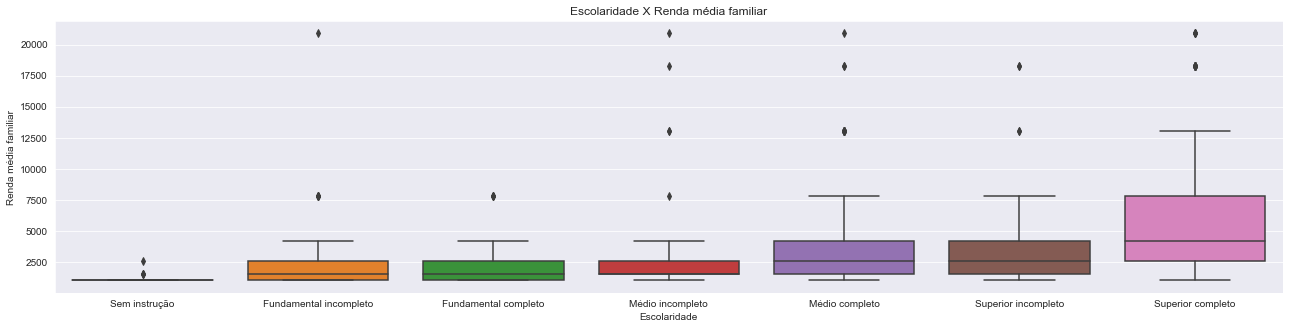

In [29]:
fig, ax = plt.subplots(figsize=(22,5))
plot = sns.boxplot(x='Escolaridade', y='Renda média familiar', data=dados, order=ordem)
plot.set_title('Escolaridade X Renda média familiar');

# Aqui há uma certa tendência direta, quanto maior a escolaridade do entrevistado maior a renda familiar.

### Avaliação do governo

In [30]:
ordem = ['Péssima', 'Ruim', 'Regular negativa', 'Regular positiva', 'Boa', 'Ótima', 'Não sabem']

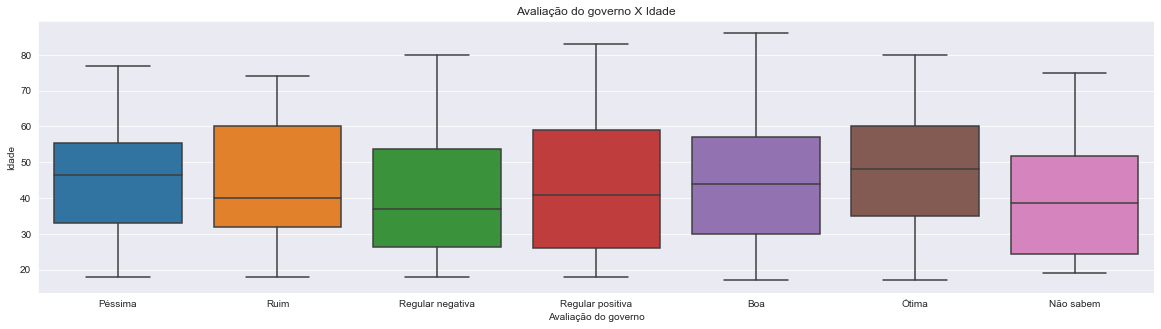

In [31]:
# boxplot com idade ente avaliação do governo

fig, ax = plt.subplots(figsize=(20,5))
plot = sns.boxplot(x='Avaliação do governo', y='Idade', data=dados, order=ordem)
plot.set_title('Avaliação do governo X Idade');

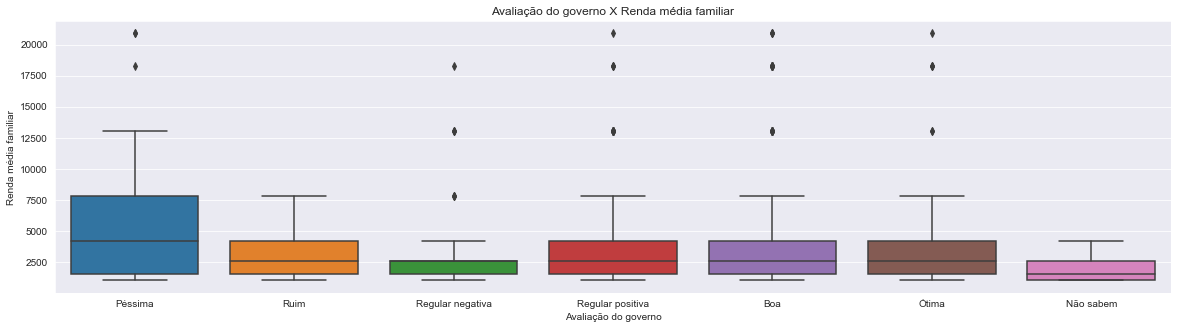

In [32]:
# boxplot com avaliação do governo e renda média familar

fig, ax = plt.subplots(figsize=(20,5))
plot = sns.boxplot(x='Avaliação do governo', y='Renda média familiar', data=dados, order=ordem)
plot.set_title('Avaliação do governo X Renda média familiar');

# Na pesquisa, entrevistados com uma avaliação péssima do governo tendem a ter uma renda familiar mais alta.

### Intenção de voto

In [33]:
ordem = [f'Candidato {i+1}' for i in range(14)]

# usar dados desconsiderando os nulos/brancos e não sabem/não responderam
dados_plot = dados.loc[(dados['Intenção de voto'] != 'Ninguém/Branco/Nulo') & (dados['Intenção de voto'] != 'NS/NR'), :]

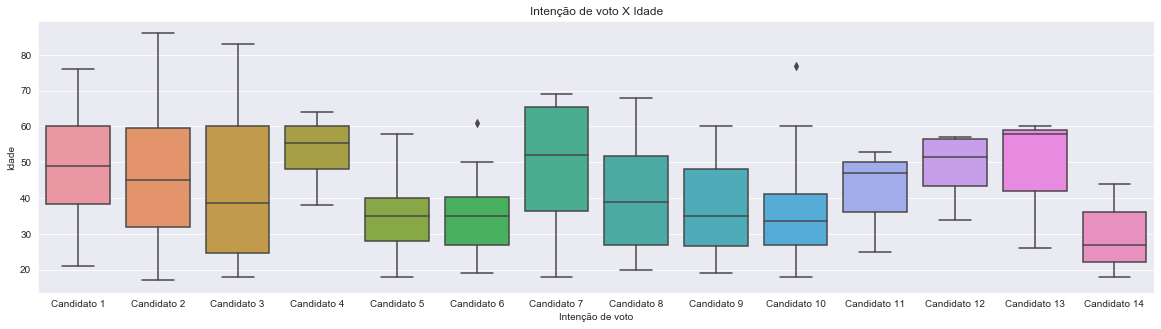

In [34]:
# boxplot com canditatos e idade

fig, ax = plt.subplots(figsize=(20,5))
plot = sns.boxplot(x='Intenção de voto', y='Idade', data=dados_plot, order=ordem)
plot.set_title('Intenção de voto X Idade');

# O eleitorado mais jovem pertence ao Candidato 14 com uma mediana abaixo dos 30 anos.
# O candidato 4 é o que tem as intenções dos eleitores de mais idade. Mediana entre 50 e 60 anos.

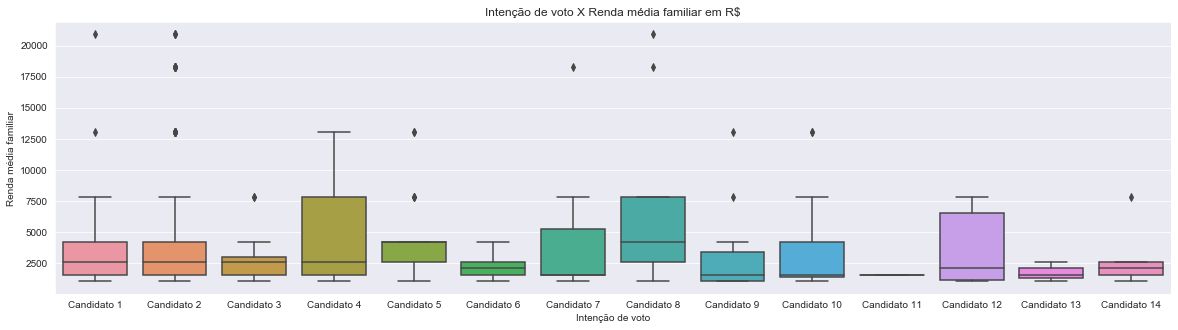

In [35]:
# boxplot com Intenção de voto e renda média familiar

fig, ax = plt.subplots(figsize=(20,5))
plot = sns.boxplot(x='Intenção de voto', y='Renda média familiar', data=dados_plot, order=ordem)
plot.set_title('Intenção de voto X Renda média familiar em R$');

### Análise do candidato com mais intenções de votos: Candidato 2

In [36]:
candidato_2 = dados.loc[dados['Intenção de voto'] == 'Candidato 2', :]
candidato_2.head()

,Sexo,Idade,Escolaridade,Avaliação do governo,Intenção de voto,Faixa etária,Renda média familiar,Salário mínimo
0,Masculino,57,Médio completo,Regular positiva,Candidato 2,55-64,2613.0,de 2 a 3
2,Masculino,70,Médio completo,Boa,Candidato 2,65+,7838.0,de 5 a 10
3,Masculino,50,Fundamental incompleto,Ótima,Candidato 2,45-54,2613.0,de 2 a 3
4,Masculino,24,Superior incompleto,Boa,Candidato 2,17-24,4180.5,de 3 a 5
7,Masculino,17,Médio completo,Boa,Candidato 2,17-24,1568.0,de 1 a 2


#### Contagens em cada variável

In [37]:
# Sexo

candidato_2['Sexo'].value_counts()

Feminino     295
Masculino    228
Name: Sexo, dtype: int64

In [38]:
# Escolaridade

candidato_2['Escolaridade'].value_counts()

Médio completo            177
Fundamental incompleto    105
Superior completo          93
Fundamental completo       50
Superior incompleto        45
Médio incompleto           43
Sem instrução              10
Name: Escolaridade, dtype: int64

In [39]:
# Avaliação do governo

candidato_2['Avaliação do governo'].value_counts()

Boa                 300
Ótima               154
Regular positiva     59
Regular negativa      7
Ruim                  1
Não sabem             1
Péssima               1
Name: Avaliação do governo, dtype: int64

In [40]:
# Faixa etária

candidato_2['Faixa etária'].value_counts()

55-64    115
35-44     94
25-34     93
45-54     81
65+       76
17-24     64
Name: Faixa etária, dtype: int64

In [41]:
# Salário mínimo

candidato_2['Salário mínimo'].value_counts()

de 1 a 2      138
até 1         106
de 2 a 3      100
de 3 a 5       96
de 5 a 10      56
de 10 a 15     13
de 15 a 20     11
mais de 20      3
Name: Salário mínimo, dtype: int64

### Análises de algumas tabelas de contingência

In [42]:
# Intenção de voto X Sexo

tabela_contingencia(dados=dados, linhas='Intenção de voto', colunas='Sexo', margens=False)

Sexo,Feminino,Masculino
Intenção de voto,,
Branco/Nulo,72,70
Candidato 1,11,31
Candidato 10,14,6
Candidato 11,1,2
Candidato 12,3,3
Candidato 13,2,1
Candidato 14,6,0
Candidato 2,295,228
Candidato 3,9,7


In [43]:
# Intenção de voto X ['Escolaridade' e 'Sexo']

tabela_contingencia(dados=dados, linhas='Intenção de voto', colunas=['Escolaridade', 'Sexo'], margens=False)

# O voto masculino só é maior para o Candidato 2 para eleitores com ensino fundamental completo e mesmo assim por pouca diferença.

Escolaridade     Fundamental completo           Fundamental incompleto  \
Sexo                         Feminino Masculino               Feminino   
Intenção de voto                                                         
Branco/Nulo                         4         7                      6   
Candidato 1                         0         2                      2   
Candidato 10                        0         1                      2   
Candidato 11                        0         0                      0   
Candidato 12                        0         0                      1   
Candidato 13                        0         1                      0   
Candidato 14                        0         0                      0   
Candidato 2                        23        27                     53   
Candidato 3                         0         1                      3   
Candidato 4                         0         0                      1   
Candidato 5                         0         0                      0   
Candidato 6                         0         0                      1   
Candidato 7                         0         0                      1   
Candidato 8                         1         1                      1   
Candidato 9                         2         1                      1   
Não sabem                           4         9                     19   

Escolaridade               Médio completo           Médio incompleto  \
Sexo             Masculino       Feminino Masculino         Feminino   
Intenção de voto                                                       
Branco/Nulo             17             33        26                9   
Candidato 1             12              3         7                0   
Candidato 10             0              6         3                2   
Candidato 11             1              1         0                0   
Candidato 12             1              0         0                0   
Candidato 13             0              2         0                0   
Candidato 14             0              1         0                3   
Candidato 2             52            101        76               27   
Candidato 3              1              2         3                0   
Candidato 4              2              1         2                0   
Candidato 5              0              5         0                1   
Candidato 6              0              2         2                1   
Candidato 7              1              1         0                1   
Candidato 8              0              4         2                1   
Candidato 9              2              2         3                1   
Não sabem                4             23        15                6   

Escolaridade               Sem instrução           Superior completo  \
Sexo             Masculino      Feminino Masculino          Feminino   
Intenção de voto                                                       
Branco/Nulo              5             1         0                10   
Candidato 1              2             0         0                 5   
Candidato 10             1             1         0                 2   
Candidato 11             0             0         0                 0   
Candidato 12             1             0         0                 1   
Candidato 13             0             0         0                 0   
Candidato 14             0             0         0                 2   
Candidato 2             16             6         4                59   
Candidato 3              0             0         0                 1   
Candidato 4              0             0         0                 1   
Candidato 5              1             0         0                 4   
Candidato 6              1             0         0                 2   
Candidato 7              0             0         0                 0   
Candidato 8              0             0         0                 6   


In [44]:
# Intenção de voto X ['Faixa etária' e 'Sexo']

tabela_contingencia(dados=dados, linhas='Intenção de voto', colunas=['Faixa etária', 'Sexo'], margens=False)

# Voto masculino para o Candidato 2 é maior entre os mais jovens e empatado para pessoas acima de 65 anos.

Faixa etária        17-24              25-34              35-44            \
Sexo             Feminino Masculino Feminino Masculino Feminino Masculino   
Intenção de voto                                                            
Branco/Nulo            13         6       14        13       15        10   
Candidato 1             0         1        3         4        2         8   
Candidato 10            3         2        4         2        3         1   
Candidato 11            0         0        0         1        0         0   
Candidato 12            0         0        1         0        0         1   
Candidato 13            0         0        0         1        0         0   
Candidato 14            2         0        2         0        1         0   
Candidato 2            28        36       57        36       57        37   
Candidato 3             1         3        1         2        2         0   
Candidato 4             0         0        0         0        0         1   
Candidato 5             2         1        3         6        6         3   
Candidato 6             1         1        2         1        2         1   
Candidato 7             1         0        1         0        0         1   
Candidato 8             1         2        3         4        1         3   
Candidato 9             1         3        3         2        1         3   
Não sabem              15         9        7        12       17        11   

Faixa etária        45-54              55-64                65+            
Sexo             Feminino Masculino Feminino Masculino Feminino Masculino  
Intenção de voto                                                           
Branco/Nulo             8        12       11        18       11        11  
Candidato 1             1         7        2         6        3         5  
Candidato 10            1         1        2         0        1         0  
Candidato 11            1         1        0         0        0         0  
Candidato 12            1         0        1         2        0         0  
Candidato 13            0         0        2         0        0         0  
Candidato 14            0         0        0         0        1         0  
Candidato 2            47        34       68        47       38        38  
Candidato 3             1         0        1         2        3         0  
Candidato 4             0         4        4         3        0         0  
Candidato 5             2         1        1         0        0         0  
Candidato 6             1         0        1         0        0         0  
Candidato 7             0         1        1         0        0         2  
Candidato 8             3         2        4         0        2         1  
Candidato 9             1         2        1         1        0         1  
Não sabem              16         6       12         9       16        10